# IBM Applied Data Science Capstone

## SCHOOL FINDER

### PROJECT BY: AKANKSHA YADAV

### INTRODUCTION
India counts for more than 315 million students. With respect to population, in Mumbai there are up to 100 million students. Each student needs education, for which nearly every one of them attends a school. Observing the population of students in mumbai plus their need for school, they need best possible education. 


Mumbai has an area of about 4355 sq. km which makes it difficult to locate the best possible school for students. For students and parents, selecting best school is difficult due to large area in Mumbai. 


### BUSINESS PROBLEM
The problem here arises that which school is preferred by your child according to your family income and child’s interest. Plus which education board it is and in which area it is located are the factors a parent must consider while searching for a school for his/her child. It will be utterly problematic to search for each school and compare these factors. Also as Mumbai is big city with huge population, schools for children should be chosen in such a way that travelling is easier. Being Mumbai, monsoon season causes much problem in travelling as everyone knows. This idea can solve the problems faced by parents and students by helping them choose the best school based on their nearest proximity. Hence, this project aims to collect data of the schools of mumbai and locate them with their characteristics. 

###### The data used will be the location of schools that will be acquired using the Foursquare website. 

#### IMPORTING LIBRARIES

In [1]:
import requests

In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image 
from IPython.core.display import HTML

In [3]:
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    ------------------------------------------------------------
                       

In [4]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0           conda-forge
    geopy:         1.22.0-pyh9f0ad1d_0 conda-forge


geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [5]:

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

In [6]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

### Foursquare Credentials

In [ ]:
CLIENT_ID="**********************************************"
CLIENT_SECRET="***********************************************"
VERSION=20180604
LIMIT=200

#### GETTING LOCATION COORDINATES

In [60]:
address = 'Mumbai'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

18.9387711 72.8353355


### Data Gathering

In [61]:
search_query='School'
radius = 500

In [62]:
url='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll=19.0760,72.8777&v=20180604&query=School'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [63]:
results = requests.get(url).json()
print(results)

{'meta': {'code': 200, 'requestId': '5ee24be275a94d3ebe2162b8'}, 'response': {'venues': [{'id': '4dc4e64b2271f270511faaf0', 'name': 'Nehru Nagar Municipal School', 'location': {'address': 'Sai Hill Rd.', 'lat': 19.062062196553647, 'lng': 72.87755823817292, 'labeledLatLngs': [{'label': 'display', 'lat': 19.062062196553647, 'lng': 72.87755823817292}], 'distance': 1551, 'postalCode': '400024', 'cc': 'IN', 'city': 'Mumbai', 'state': 'Mahārāshtra', 'country': 'India', 'formattedAddress': ['Sai Hill Rd.', 'Mumbai 400024', 'Mahārāshtra', 'India']}, 'categories': [{'id': '4bf58dd8d48988d13b941735', 'name': 'School', 'pluralName': 'Schools', 'shortName': 'School', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1591889544', 'hasPerk': False}, {'id': '4f9bfabfe4b0027bd481213c', 'name': 'janseva motor training school', 'location': {'lat': 19.07366, 'lng': 72.880009, 'labeledLatLngs': [{'label': 'display', 'lat': 

### Data Preprocessing and Wrangling

In [64]:
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.shape


(30, 17)

In [65]:
dataframe.isnull().sum()

categories                    0
hasPerk                       0
id                            0
location.address             10
location.cc                   0
location.city                10
location.country              0
location.crossStreet         19
location.distance             0
location.formattedAddress     0
location.labeledLatLngs       0
location.lat                  0
location.lng                  0
location.postalCode          18
location.state                9
name                          0
referralId                    0
dtype: int64

### Data Filtering

In [66]:
dataframe_1=dataframe[['name','location.address','location.city','location.distance','location.lat','location.lng']]

In [67]:
dataframe_1.head()

,name,location.address,location.city,location.distance,location.lat,location.lng
0,Nehru Nagar Municipal School,Sai Hill Rd.,Mumbai,1551,19.062062,72.877558
1,janseva motor training school,NaN,NaN,356,19.073660,72.880009
2,School of Communications & Reputation,"1st Floor, Kohinoor Education Complex, Kurla West",Mumbai,992,19.075196,72.887099
3,Kohinoor Business School,NaN,NaN,505,19.076290,72.882491
4,Kohinoor Business School,"Kohinoor Education Complex, Kohinoor City, Kir...",Mumbai,769,19.073995,72.870699


In [68]:
dataframe_1.rename(columns={"location.lat": "Latitude"},inplace=True)
dataframe_1.rename(columns={"name": "School Name"},inplace=True)
dataframe_1.rename(columns={"location.address":"School Address"},inplace=True)
dataframe_1.rename(columns={"location.city":"City"},inplace=True)
dataframe_1.rename(columns={"location.distance":"Distance"},inplace=True)
dataframe_1.rename(columns={"location.lng": "Longitude"},inplace=True)
dataframe_1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,School Name,School Address,City,Distance,Latitude,Longitude
0,Nehru Nagar Municipal School,Sai Hill Rd.,Mumbai,1551,19.062062,72.877558
1,janseva motor training school,NaN,NaN,356,19.073660,72.880009
2,School of Communications & Reputation,"1st Floor, Kohinoor Education Complex, Kurla West",Mumbai,992,19.075196,72.887099
3,Kohinoor Business School,NaN,NaN,505,19.076290,72.882491
4,Kohinoor Business School,"Kohinoor Education Complex, Kohinoor City, Kir...",Mumbai,769,19.073995,72.870699


In [69]:
dataframe_1["City"].value_counts()

Mumbai    19
mumbai     1
Name: City, dtype: int64

In [70]:
dataframe_1["City"].isnull().sum()

10

In [71]:
import seaborn as sns

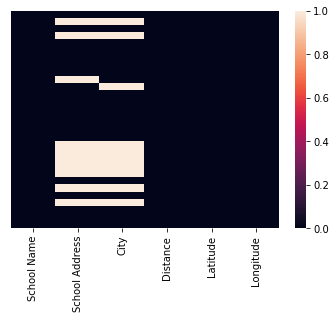

In [72]:
sns.heatmap(dataframe_1.isnull(),yticklabels=False)
plt.show()

### Data Cleaning

In [73]:
dataframe_1["City"].replace(np.nan,"Mumbai",inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [74]:
dataframe_1.head()

,School Name,School Address,City,Distance,Latitude,Longitude
0,Nehru Nagar Municipal School,Sai Hill Rd.,Mumbai,1551,19.062062,72.877558
1,janseva motor training school,NaN,Mumbai,356,19.073660,72.880009
2,School of Communications & Reputation,"1st Floor, Kohinoor Education Complex, Kurla West",Mumbai,992,19.075196,72.887099
3,Kohinoor Business School,NaN,Mumbai,505,19.076290,72.882491
4,Kohinoor Business School,"Kohinoor Education Complex, Kohinoor City, Kir...",Mumbai,769,19.073995,72.870699


In [75]:
dataframe_1["School Address"].isnull().sum()

10

In [76]:
dataframe_1["School Name"].isnull().sum()

0

In [77]:
dataframe_1["Distance"].isnull().sum()

0

In [78]:
dataframe_1["Latitude"].isnull().sum()

0

In [79]:
dataframe_1["Longitude"].isnull().sum()

0

In [83]:
dataframe_1.dropna(inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


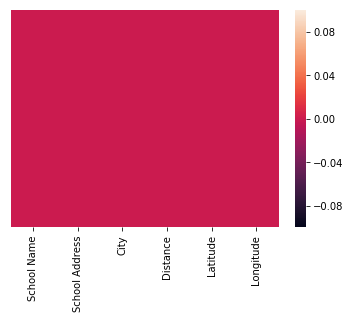

In [84]:
sns.heatmap(dataframe_1.isnull(),yticklabels=False)
plt.show()

In [85]:
dataframe_1.shape

(20, 6)

## MODEL FITTING

#### CLUSTERING

In [95]:
from sklearn.cluster import KMeans
k=4
kmeans=KMeans(n_clusters=k, random_state=0).fit(dataframe_1[['Latitude','Longitude']])

In [96]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 1, 2, 0, 0],
      dtype=int32)

In [123]:
labels=kmeans.labels_
dataframe_1['Labels']=labels
dataframe_1.head(15)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,School Name,School Address,City,Distance,Latitude,Longitude,Labels
0,Nehru Nagar Municipal School,Sai Hill Rd.,Mumbai,1551,19.062062,72.877558,0
2,School of Communications & Reputation,"1st Floor, Kohinoor Education Complex, Kurla West",Mumbai,992,19.075196,72.887099,0
4,Kohinoor Business School,"Kohinoor Education Complex, Kohinoor City, Kir...",Mumbai,769,19.073995,72.870699,0
5,"Richard Ivey School of Business, India","Regus Trade Centre,",Mumbai,788,19.072643,72.871102,0
6,karthika high school,new hall road,mumbai,755,19.079910,72.883575,0
7,Cardinal Gracias High School,"Ali Yawar Jung Marg, Bandra ( East )",Mumbai,3363,19.068198,72.846814,1
8,Babu Driving School,India,Mumbai,859,19.082269,72.882462,0
10,Michael High School,"Kurla, Mumbai, Maharashtra",Mumbai,986,19.083023,72.883425,0
11,Kartika High School,Kurla,Mumbai,990,19.082386,72.884256,0
12,Our Lady of Perpetual Succour (OLPS) High School,"St. Anthony's Rd, Chembur (East)",Mumbai,3945,19.051014,72.904300,0


### COLOR CODE

In [126]:
y=0
ColorCode=[]
for x in dataframe_1['Labels']:
    if x==0:
        ColorCode.append('Red')
    elif x==1:
        ColorCode.append('Green')
    elif x==2:
        ColorCode.append('Yellow')
    elif x==3:
        ColorCode.append('Blue')
print(ColorCode)


['Red', 'Red', 'Red', 'Red', 'Red', 'Green', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Yellow', 'Red', 'Red', 'Green', 'Yellow', 'Red', 'Red']


## DATA VISUALIZATION

In [122]:
%matplotlib inline
mmap=folium.Map(location=[dataframe_1['Latitude'].mean(), dataframe_1['Longitude'].mean()], zoom_start=13)
i=0
Mumbai=folium.map.FeatureGroup()
for lat, lon in zip(dataframe_1['Latitude'], dataframe_1['Longitude']):
    Mumbai.add_child(folium.features.CircleMarker([lat, lon],
        radius=5,
        color=ColorCode[i],
        fill=True,
        fill_color=ColorCode[i],
        fill_opacity=0.7))
    i=i+1
mmap.add_child(Mumbai)
mmap

## OBSERVATION
Hence parents must choose a school from the cluster near to their home by comparing other listed facilities provided.  This would make their task easier for selecting best school for their children.